# PPG2ABP Pipeline

## Contents

In this Jupyter Notebook, the pipeline of PPG2ABP is described, which primarily revolves around the following scripts

1. data_processing.py : This script processes and undersamples the data
2. data_handling.py : This script breaks the data into splits to train the deep networks
3. models.py : This script contains the several model definitions
4. metrics.py : Auxiliary script, contains metric computation
5. helper_functions.py : Auxiliary script, contains helper functions
6. train_models.py : This script trains the models using 10 fold cross validaion
7. predict_test.py : This script generates predictions for the test data
8. evaluate.py : This script evaluates PPG2ABP under several metrices

## Instructions

You may run PPG2ABP in one of the following ways

1. Download the data, train the model, evaluate :

In order to do so, please follow the Sections 1 through 6 of this notebook sequentially. Preparing the data takes around 9-11 days on a Intel Core i7-7700 CPU, and training the model requires around 11-12 days on a NVIDIA TITAN XP GPU. Therefore, you may skip some steps as we also make the outputs of different stages available publicly online, the links of which are mentioned throughout this notebook

2. Train the model and evaluate :

If you wish to just train the model, select the best one and evaluate please follow the steps from 3 through 6. Before that, please make sure that you download the **data.hdf5** file, compiled from our experiments which is available in the link [data.hdf5](https://drive.google.com/file/d/1GtsQgPP_gEdeTJHws_O9zL8BviUBWfEO/view?usp=sharing), and put it inside a directory named *data*.

The file system should look like:

.<br /> 
├── data<br /> 
│   └── data.hdf5<br /> 
│ ...


3. Evaluate PPG2ABP:

If you wish to just evaluate PPG2ABP, then just follow the steps from 5-6. Before that please make sure you've downloaded the following files:

* test.p : This file contains the test data, which can be downloaded from the link [test.p](https://drive.google.com/file/d/1YC9Qv7AWo20DULCEA4OxTCzxkGc-u7OY/view?usp=sharing). Please put this inside a directory named *data*
* meta9.p : This file contains the metadata related to signals of fold 10, which can be downloaded from the link [meta9.p](https://drive.google.com/file/d/1bO93Z6r1rqZUZC3zQdvHQSSCjap_muia/view?usp=sharing). Please put this inside a directory named *data*
* ApproximateNetwork.h5 : This file contains the weights of the best ApproximateNetwork model obtained in our experiments (10th fold), which can be downloaded from the link [ApproximateNetwork.h5](https://drive.google.com/file/d/1R0t3VxPLBpQmIKKyH9ulDdr9irwsyOpD/view?usp=sharing). Please put this inside a directory named *models*

* RefinementNetwork.h5 : This file contains the weights of the best RefinementNetwork model obtained in our experiments (10th fold), which can be downloaded from the link [RefinementNetwork.h5](https://drive.google.com/file/d/1qc97paeXHDWrOEsPR1_2tl7WtMcJxQbF/view?usp=sharing). Please put this inside a directory named *models*

The file system should look like:

.<br /> 
├── data<br /> 
│   ├── meta.p<br />
│   └── test.p<br /> 
├── models<br /> 
│   ├── ApproximateNetwork.h5<br />
│   └── RefinementNetwork.h5<br /> 
│ ...


## Note

It is a well-known fact that training deep networks using GPUs is a nondeterministic process, therefore training new models on the same data hardly ensures identical configuration of models. Therefore, to achieve the same results as we presented in our paper we request using our provided models and data split (the data splitting were performed in 9 computers parallely to speed up the process, therefore this random process couldn't be seeded properly).
 


# 1. Downloading Data


## 1A. Downloading the Dataset
The dataset is available in UCI Machine Learning Repository and can be downloaded as follows:

In [ ]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/00340/data.zip

## 1B. Unzipping Data

In this stage we will unzip the data. Please make sure you have ***unzip*** installed in your system. The following command will unzip the datafiles into a directory named *raw_data*


<br /> 
<br /> 
Alternatively, you may extract the file using some other software and put the extracted files in a folder named *raw_data*
The file system should be as follows


.<br /> 
├── raw_data<br /> 
│   ├── _MACOSX<br /> 
│   ├── Part_1.mat<br /> 
│   ├── Part_2.mat<br /> 
│   ├── Part_3.mat<br /> 
│   └── Part_4.mat<br /> 





In [ ]:
! unzip data.zip -d raw_data

# 2. Processing Data

In this stage we process and downsample the dataset, as described in the manuscript.

The steps in this stage is likely to take 9-11 days to run on a Intel Core i7-7700 CPU.

The final outcome of this stage is *data.hdf5* file, which is used in subsequent training and evaluation procedure. Therefore, to ease the process we provide our compiled *data.hdf5* file, which can be downloaded from the link  [data.hdf5](https://drive.google.com/file/d/1GtsQgPP_gEdeTJHws_O9zL8BviUBWfEO/view?usp=sharing)

If you download this *data.hdf5* file you may skip the steps 2A~2E and proceed to step 3.

In that case please make sure to put the *data.hdf5* file inside a *data* directory. Therefore the file system should be

.<br /> 
├── raw_data<br /> 
├── data<br /> 
│   └── data.hdf5<br /> 

## 2A. Analyzing SBP and DBP of Signal Episodes

From the downloaded data, next we observe the SBP and DBP values of 10 seconds long PPG signals. 

After this function executes it creates a new directory called *processed_data*, which stores the records of the SBP and DBP values of signal episodes in the form of csv files.

This function is likely to take 6-7 days to run on a Intel Core i7-7700 CPU

As this function takes quite a while, we have made the output of this stage, i.e., the contents of the *processed_data* directory available for download.

The data can be downloaded from the link [processed_data.zip](https://drive.google.com/file/d/1BzPBx4JZhf14lc84DiNZWyVwS7g5b1eK/view?usp=sharing) . Please download the zip file and unzip it in this directory.

The file system should be as follows


.<br /> 
├── raw_data<br /> 
├── processed_data<br /> 
│   ├── Part_1_0.csv<br /> 
│   ├── Part_1_1.csv<br /> 
│   ├── Part_1_2.csv<br /> 
│   ├── ...<br /> 
│   ├── Part_4_2998.csv<br /> 
│   └── Part_4_2999.csv<br /> 


In [ ]:
from data_processing import process_data

process_data()

## 2B. Observing the Processed Data

After the data have been processed, the distribution of the SBP and DBP values can be observed

In [ ]:
from data_processing import observe_processed_data

observe_processed_data()

## 2C. Downsampling Data

To mitigate the extremely demanding computational requirements, we downsample our data. First of all, the signals are arranged in bins based on their SBP and DBP values. Next, from all the bins 25% of the data are selected randomly. However, if for some
bins selecting one-fourth exceeds 2500 episodes, then only 2500 episodes are included randomly. In this way, a total of 127260 random episodes are obtained, counting up to a duration of 353.5 Hours.

The information about the selected signal episodes are stored in pickle file named *candidates.p* by the function. We also make this file available for download which can be downloaded from the link [candidates.p](https://drive.google.com/file/d/1u-yvkqJmmrYCbuSw3lnS8mIIcEHRQxFD/view?usp=sharing)

Hence, alternatively the above mentioned file can be downloaded and put in the same directory, making the file system :


.<br /> 
├── raw_data<br /> 
├── processed_data<br /> 
└── candidates.p<br />


In [ ]:
from data_processing import downsample_data

downsample_data()

## 2D. Extracting the Signal Episodes

In this stage the PPG and ABP waveforms from the selected signal episodes are extracted. We first load the candidates from the *candidates.p* file. Next the extract_episodes() function extracts the individual PPG and ABP signals and stores in two directories titled *ppgs* amd *abps* respectively.

This function is likely to take 3-4 days to run on a Intel Core i7-7700 CPU

The file system becomes


 .<br /> 
├── raw_data<br /> 
├── processed_data<br /> 
├── ppgs<br /> 
├── abps<br /> 
└── candidates.p<br />

In [ ]:
from data_processing import extract_episodes
import pickle 

candidates = pickle.load(open('candidates.p', 'rb'))
extract_episodes(candidates)

## 2E. Merging the Signal Episodes

In this stage the selected signal episodes are compiled into a hdf5 file, titled *data.hdf5*, which is stored in a directory titled *data*

Since this stage along with the previous one takes a while to run we provide the *data.hdf5* which can be downloaded using the link [data.hdf5](https://drive.google.com/file/d/1GtsQgPP_gEdeTJHws_O9zL8BviUBWfEO/view?usp=sharing)

You may download the *data.hdf5* file and store it in a directory named *data*


The file system becomes


 .<br /> 
├── raw_data<br /> 
├── processed_data<br /> 
├── ppgs<br /> 
├── abps<br /> 
├── data<br /> 
│   └── data.hdf5<br /> 
└── candidates.p<br />

In [ ]:
from data_processing import merge_episodes

merge_episodes()

# 3. Handling Data

In this stage we split the data into train, test and validation data. As mentioned in the paper, out of  127260 random episodes, 100000 samples at random are chosen to be
the training-validation data (roughly 78.58%) and the remaining 27260 are used as independent test data.

As we perform a 10 fold cross validation, we divide the data into 10 training and validation splits, along with some metadata containing the min and max values of the signals, as the signals are normalized to facilitate CNN trainings.

This step needs the *data.hdf5* file stored inside the *data* directory as a must. After this step the file system becomes as follows

 .<br /> 
├── raw_data<br /> 
├── data<br /> 
│   └── data.hdf5<br /> 
│   ├── train0.p<br /> 
│   ├── val0.p<br /> 
│   ├── meta0.p<br /> 
│   ├── ...<br /> 
│   ├── train9.p<br /> 
│   ├── val9.p<br /> 
│   ├── meta9.p<br /> 
│   └── test.p<br /> 
└ ...

In [ ]:
from data_handling import fold_data

fold_data()

# 4. Training Models

In this stage we train the CNN models using a 10 fold cross validation scheme.

This stage is highly computational expensive and it takes around 11-12 days to train the models for 100 epochs for all the 10 folds using a NVIDIA TITAN XP (12 GB, 1582 MHz) GPU.

Therefore, you may skip the steps to train the model, i.e. steps 4A and 4B. We provide our version of best trained models, which is more detailedly presented in Section 4C.

## 4A. Training Approximation Network

In this stage we train the Approximation Network, which is a deeply supervised 1D U-Net network.

The training in performed using 10 fold cross validation, and thus 10 models are obtained. 

The models are stored in a *models* directory and also the training history gets stored in a *History* directory.

The file system becomes as follows

 .<br /> 
├── raw_data<br /> 
├── data<br /> 
├── History<br /> 
├── models<br /> 
│   └── UNetDS64_model1_fold0.h5<br /> 
│   ├── UNetDS64_model1_fold1.h5<br /> 
│   ├── ...<br /> 
│   └── UNetDS64_model1_fold9.h5<br /> 
└ ...


In [ ]:
from helper_functions import *
from models import *
from train_models import train_approximate_network

train_approximate_network()

## 4B. Training Refinement Network

In this stage we train the Refinement Network, which is a 1D MultiResUNet network.

The training in performed using 10 fold cross validation, and thus 10 models are obtained. 

Training the refinement network actually starts from loading the corresponding approximate network of that fold. After that approximate network has been loaded, the prediction by that network is computed and the refinement network is trained on that prediction to refine it further.

The models are stored in a *models* directory and also the training history gets stored in a *History* directory.

The file system becomes as follows

 .<br /> 
├── raw_data<br /> 
├── data<br /> 
├── History<br /> 
├── models<br /> 
│   ├── MultiResUNet1D_model2_fold0.h5<br />
│   ├── MultiResUNet1D_model2_fold1.h5<br />
│   ├── ...<br /> 
│   ├── MultiResUNet1D_model2_fold9.h5<br />
│   ├── UNetDS64_model1_fold0.h5<br /> 
│   ├── UNetDS64_model1_fold1.h5<br /> 
│   ├── ...<br /> 
│   └── UNetDS64_model1_fold9.h5<br /> 
└ ...


In [ ]:
from helper_functions import *
from models import *
from train_models import train_refinement_network

train_refinement_network()

## 4C. Selecting the Best Model

Based on the performance on the validation set, the model pair from the best performing fold is selected. Those two models needs to be duplicated inside the *models* directory, and needs to be renamed to **ApproximateNetwork.h5** and **RefinementNetwork.h5** respectively, as the subsequent steps will load those models.

Training deep networks using GPU is a non-deterministic process and due to randomness often the training process varies, leading to different state of the model. Therefore, for tje sake of reproducibility of our presented results we provide our versions of **ApproximateNetwork.h5** and **RefinementNetwork.h5** obtained through our experiments. The models can be found in the following links [ApproximateNetwork.h5](https://drive.google.com/file/d/1R0t3VxPLBpQmIKKyH9ulDdr9irwsyOpD/view?usp=sharing) and [RefinementNetwork.h5](https://drive.google.com/file/d/1qc97paeXHDWrOEsPR1_2tl7WtMcJxQbF/view?usp=sharing)

You may download these two files and put them in the *models* directory. The file system becomes.

 .<br /> 
├── raw_data<br /> 
├── data<br /> 
├── History<br /> 
├── models<br /> 
│   ├── ApproximateNetwork.h5<br />
│   ├── RefinementNetwork.h5<br />
│   └── ...<br /> 
└ ...

# 5. Generate Predictions on Test Data

After finalizing the training and selection of the best model pair, we compute the predictions on the test data and store that as **test_output.p** file, so that we don't need to recompute this during evaluation of PPG2ABP.

Please note that all the evaluation functions require the **test_output.p** file to operate.

In [3]:
from helper_functions import *
from models import UNetDS64, MultiResUNet1D
import os
from predict_test import predict_test_data

predict_test_data()

852/852 [==============================] - 536s 627ms/step


# 6. Evaluation

## 6A. Evaluation of Predicting ABP Waveforms

Here, we present an interactive CLI to predict the ABP waveform from PPG signal from the test data. Ground truth, prediction from approximation network and refinement network are presented, and a comparison is also demonstrated


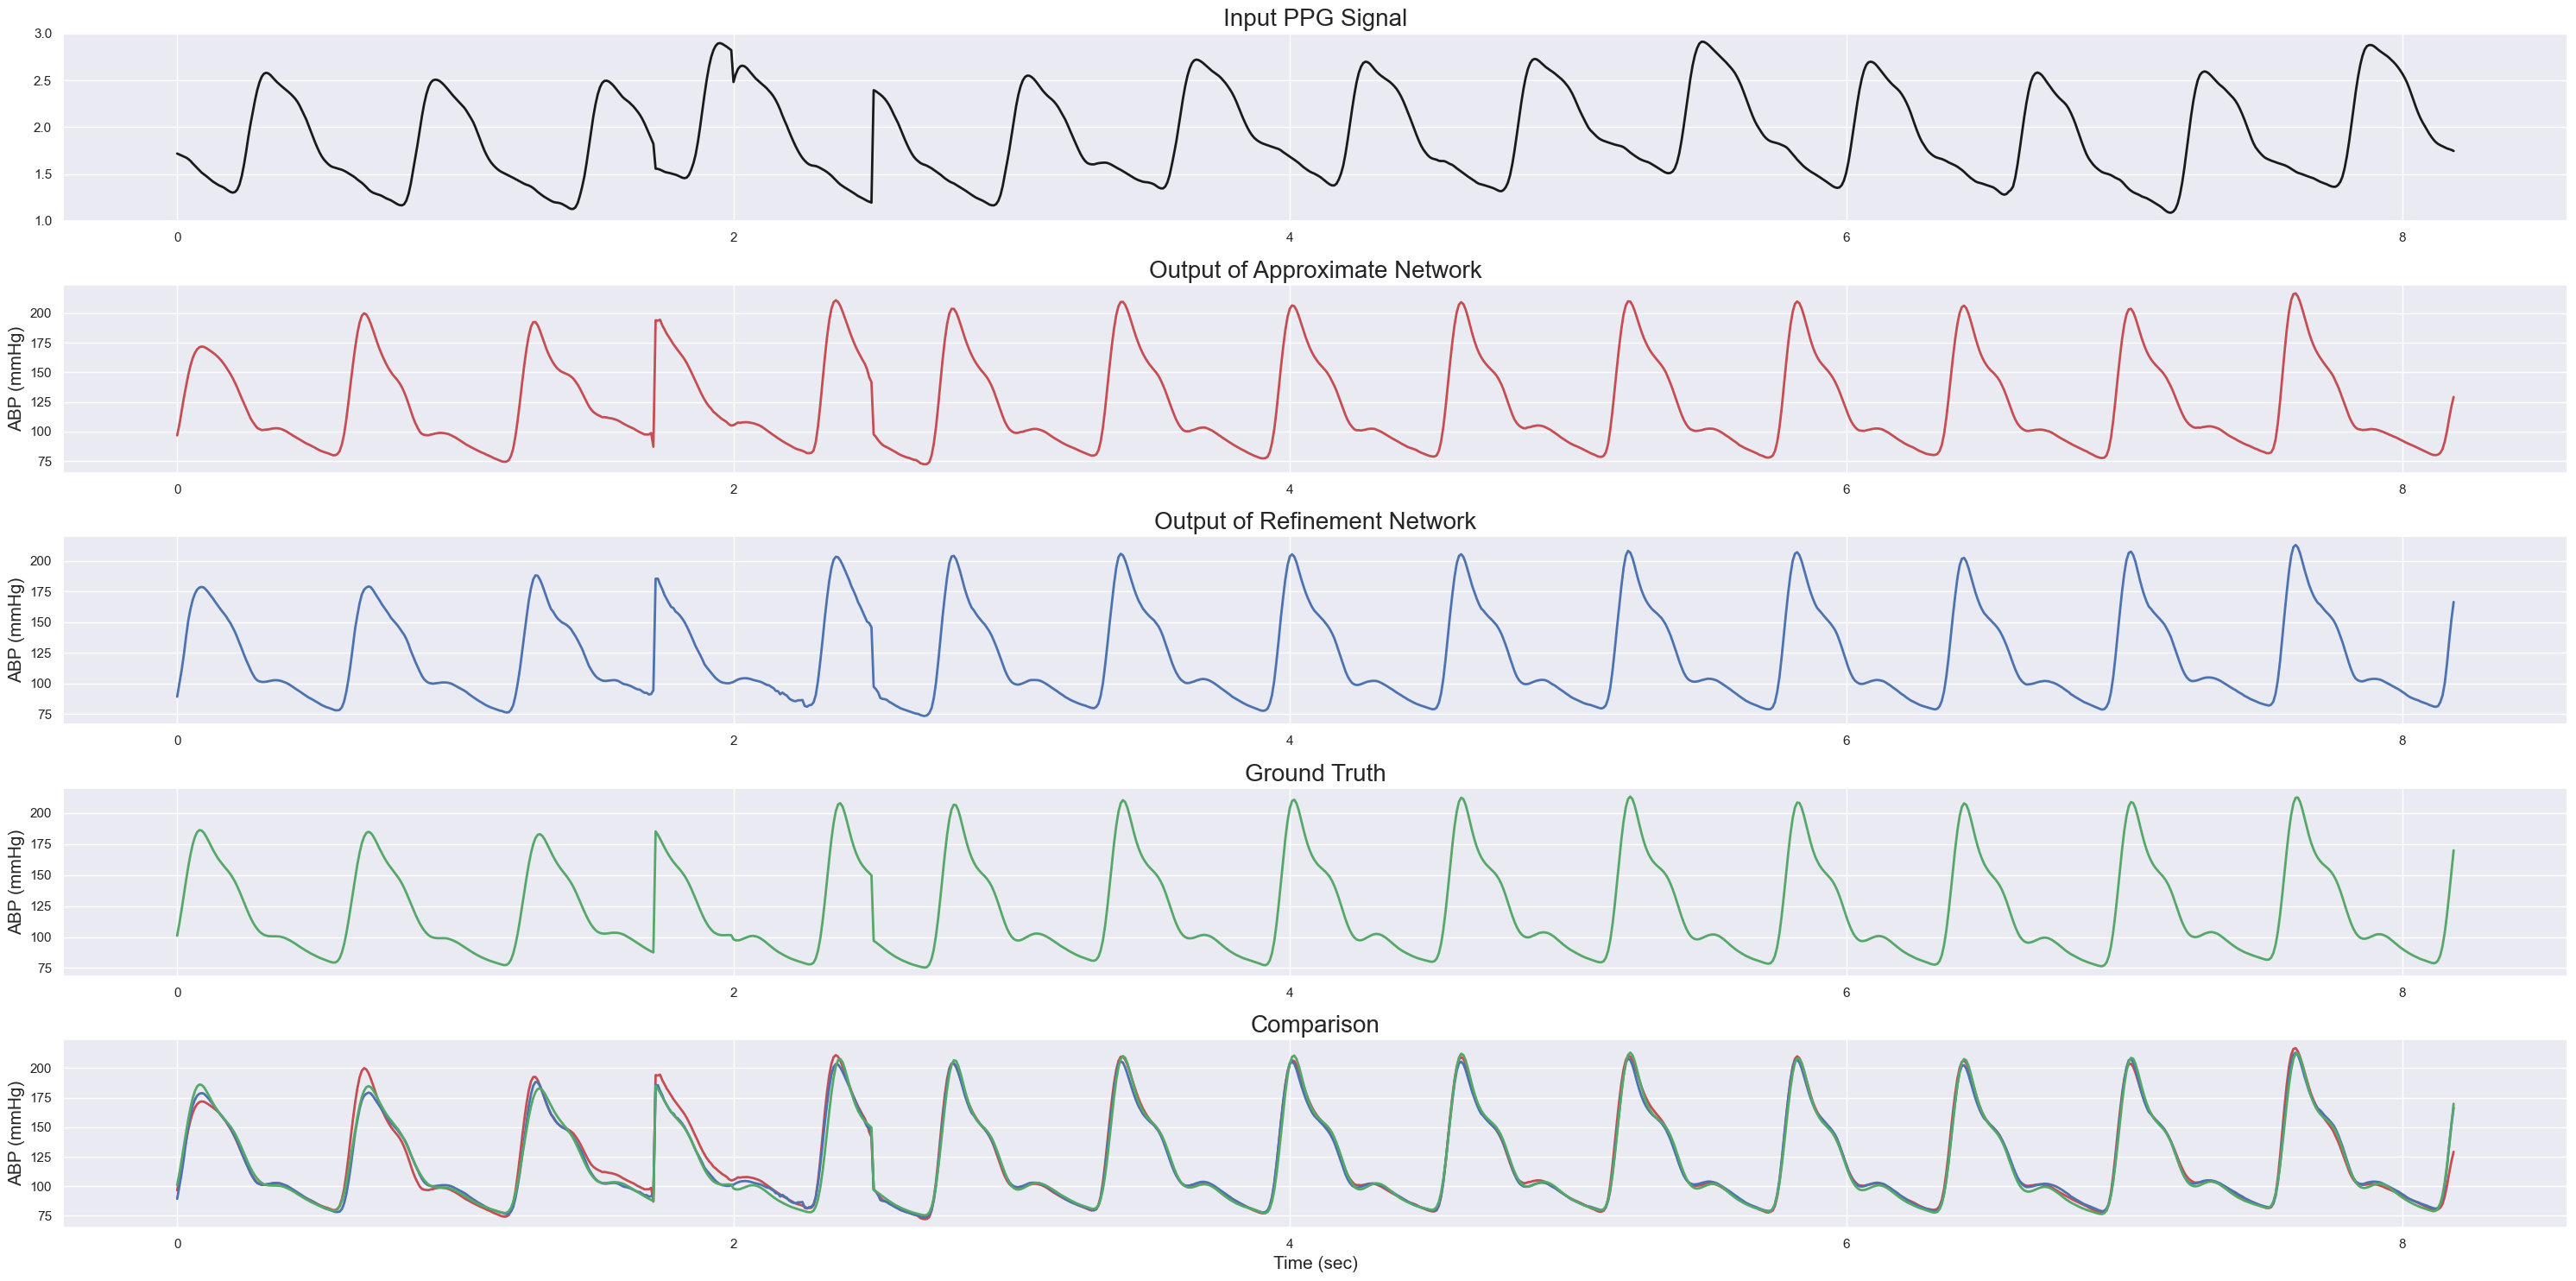

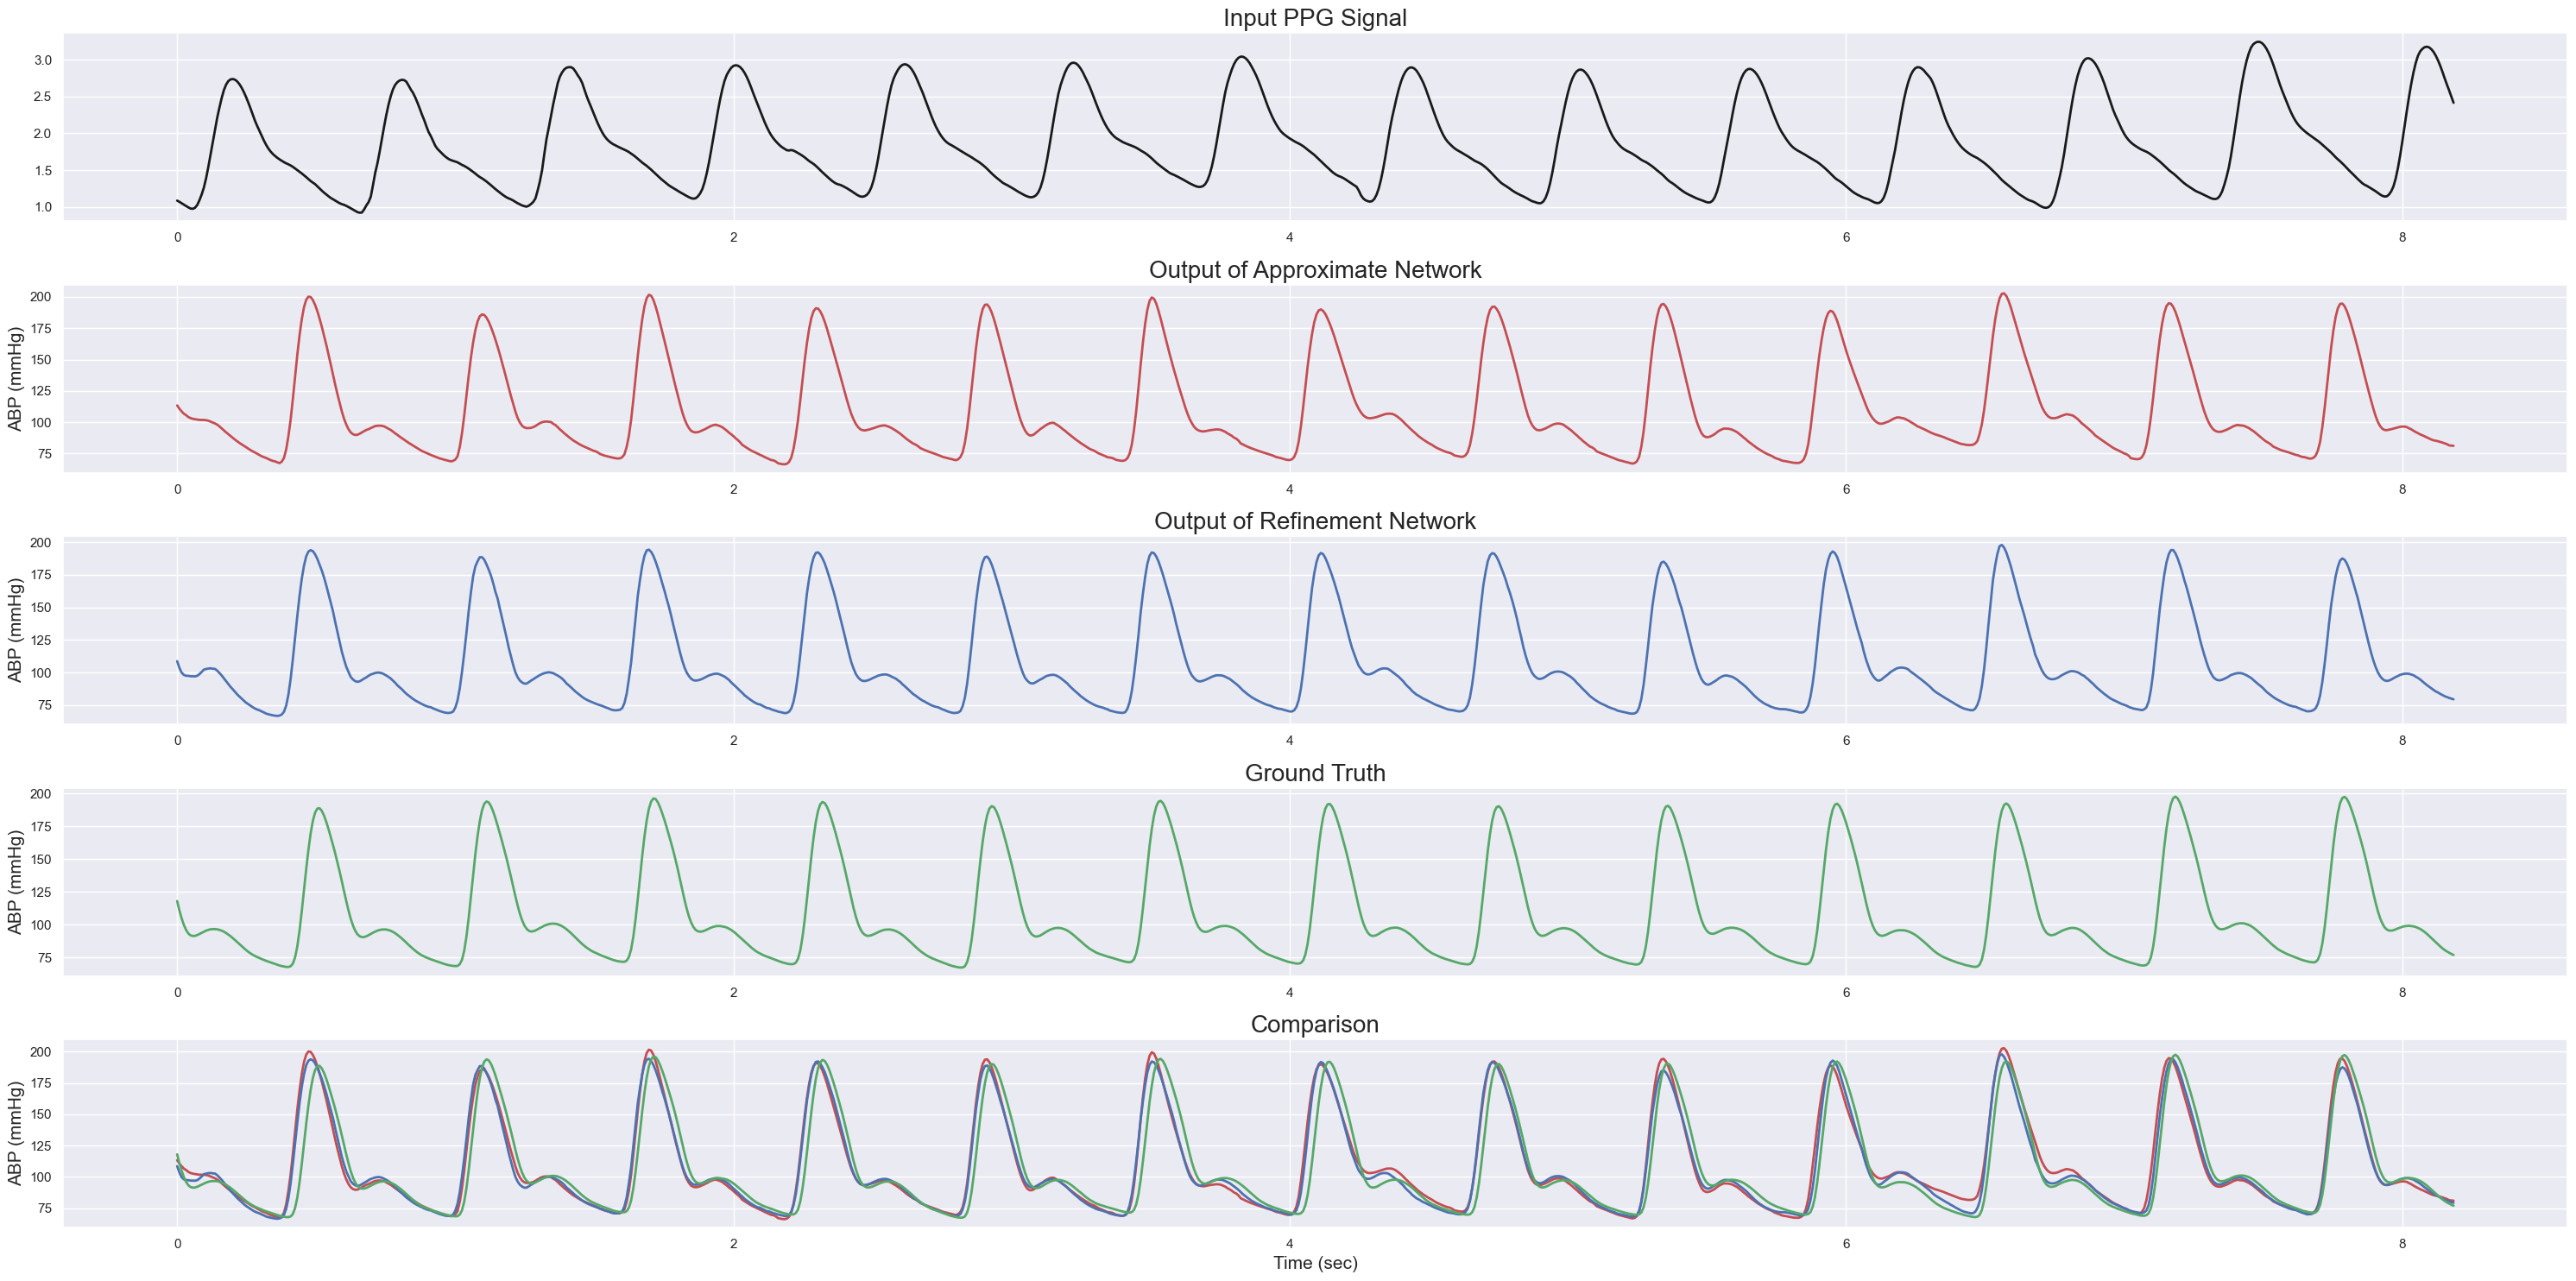

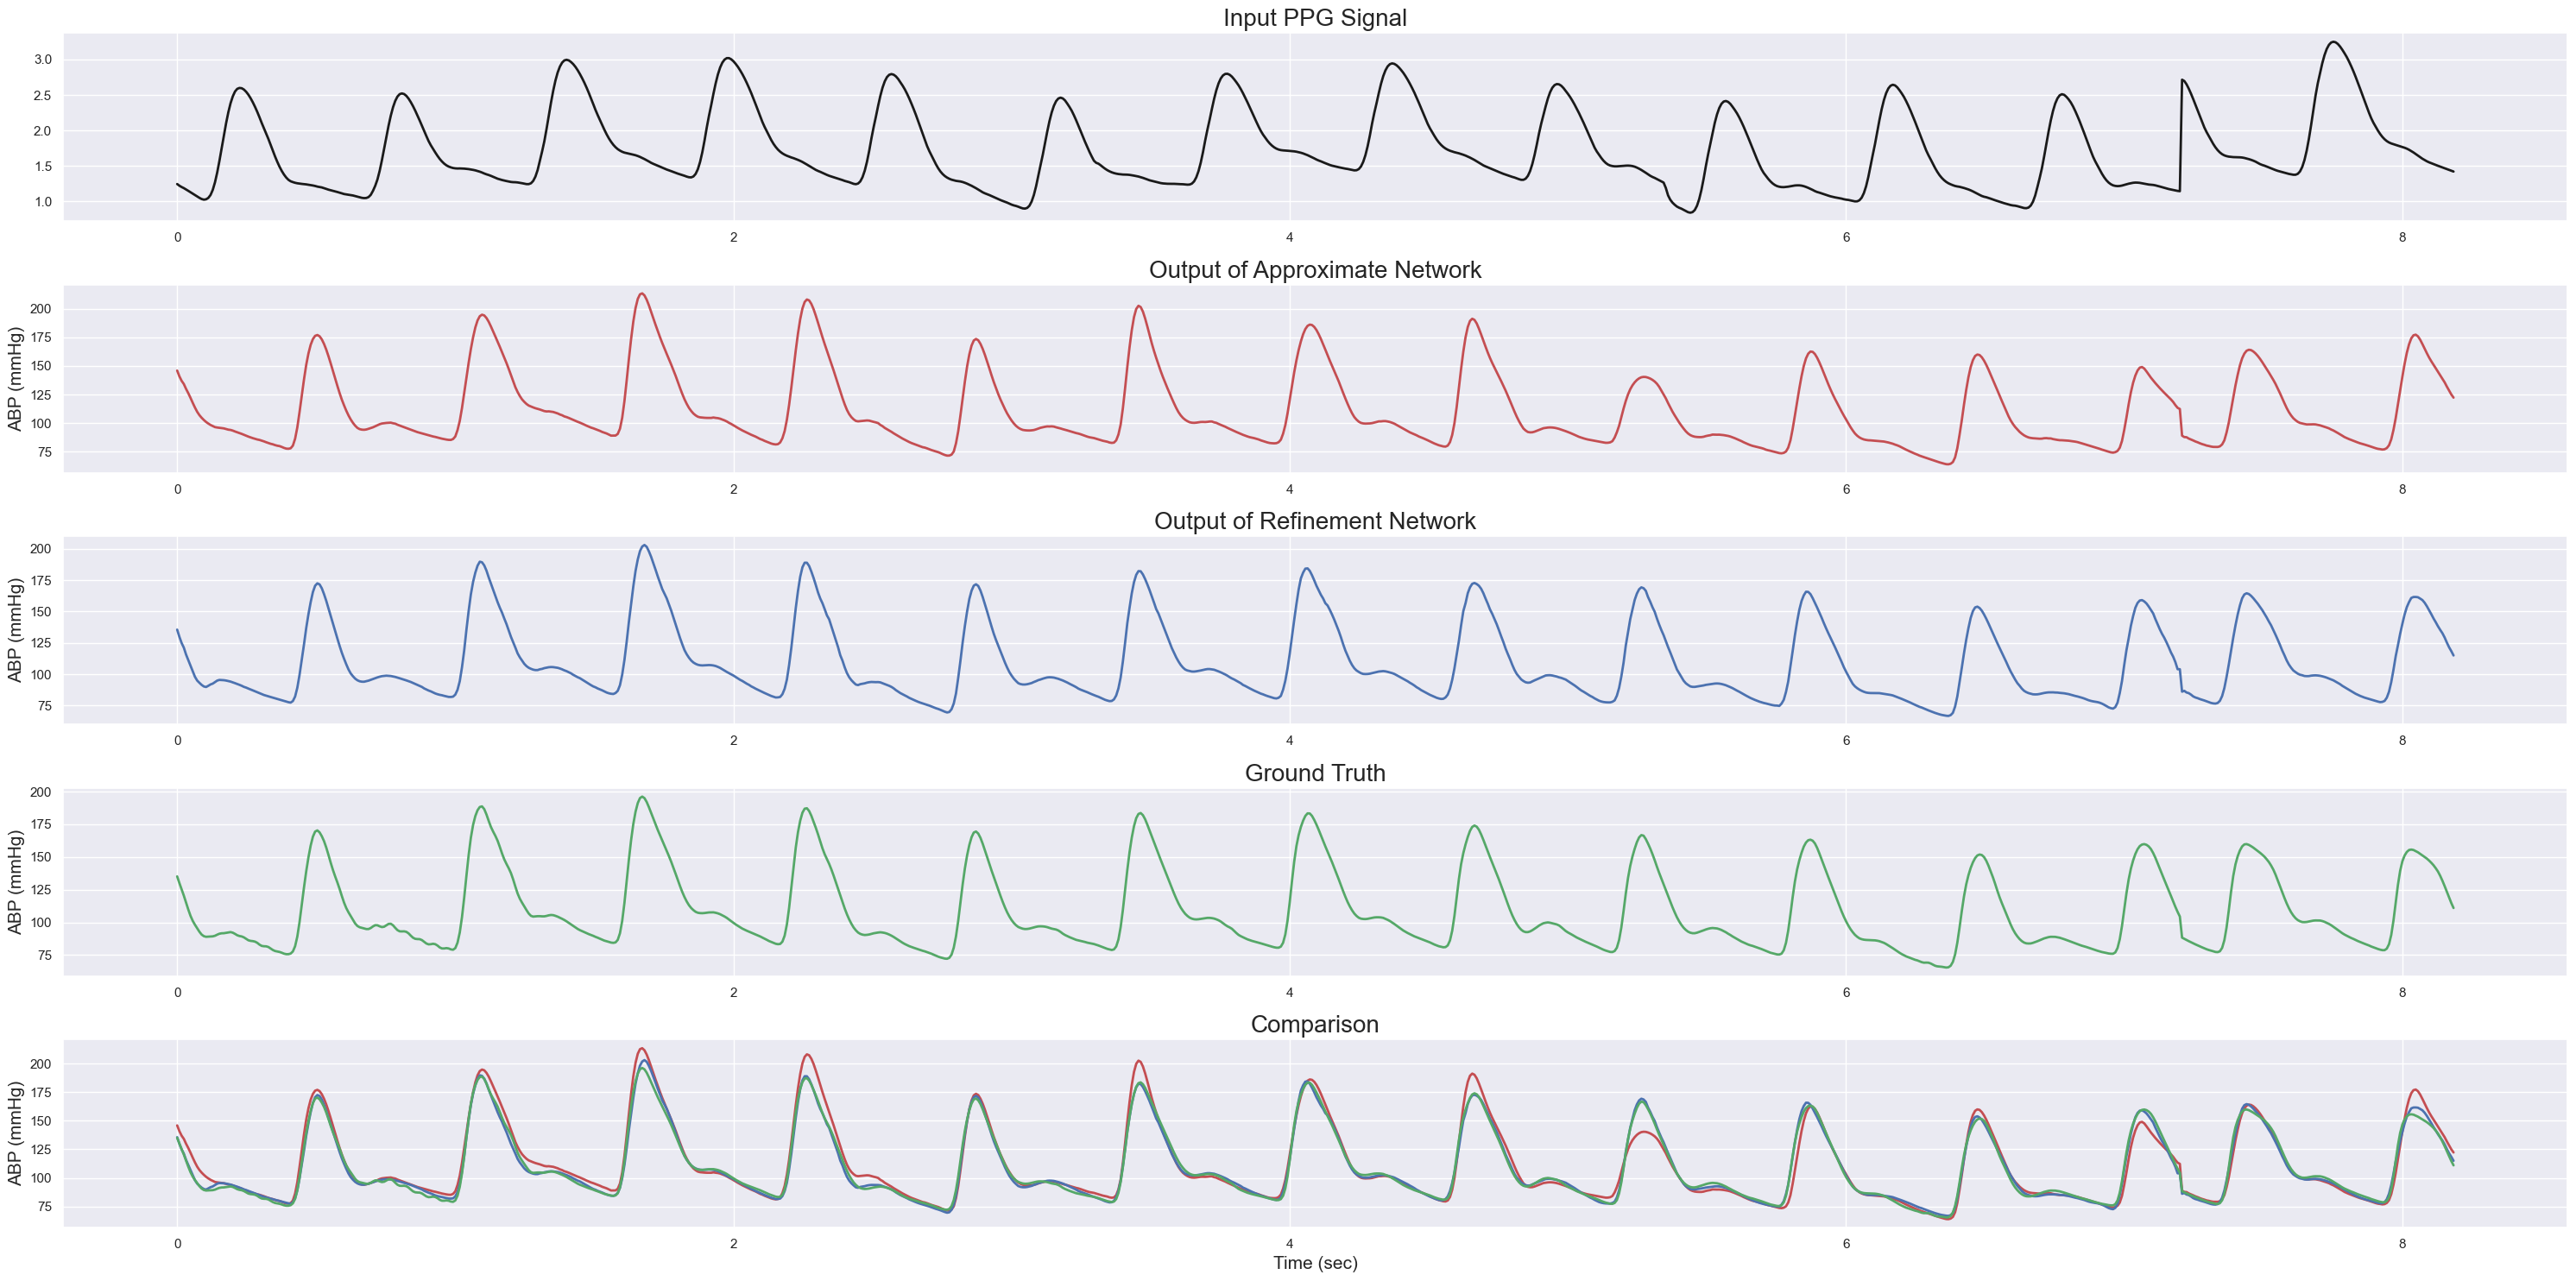

In [1]:
from evaluate import predicting_ABP_waveform

predicting_ABP_waveform()

## 6B. Evaluation of BHS Standard

Here, we evaluate PPG2ABP based on BHS Standard Metric 

----------------------------
|        BHS-Metric        |
----------------------------
----------------------------------------
|     | <= 5mmHg | <=10mmHg | <=15mmHg |
----------------------------------------
| DBP |  82.8 %  |  92.2 %  |  95.7 %  |
| MAP |  87.4 %  |  95.2 %  |  97.7 %  |
| SBP |  70.8 %  |  85.3 %  |  90.9 %  |
----------------------------------------


c:\Users\LuckyVerma\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\LuckyVerma\Documents\ABP-estimation-using-PPG\other\PPG2ABP\codes\evaluate.py:232: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['0 \%', '3.67 \%', '7.34 \%',
c:\Users\LuckyVerma\Documents\ABP-estimation-using-PPG\other\PPG2ABP\codes\evaluate.py:258: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['0 \%', '7.34 \%', '14.67 \%',
c:\Users\LuckyVerma\Documents\ABP-estimation-using-PPG\other\PPG2ABP\codes\evaluate.py:284: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['

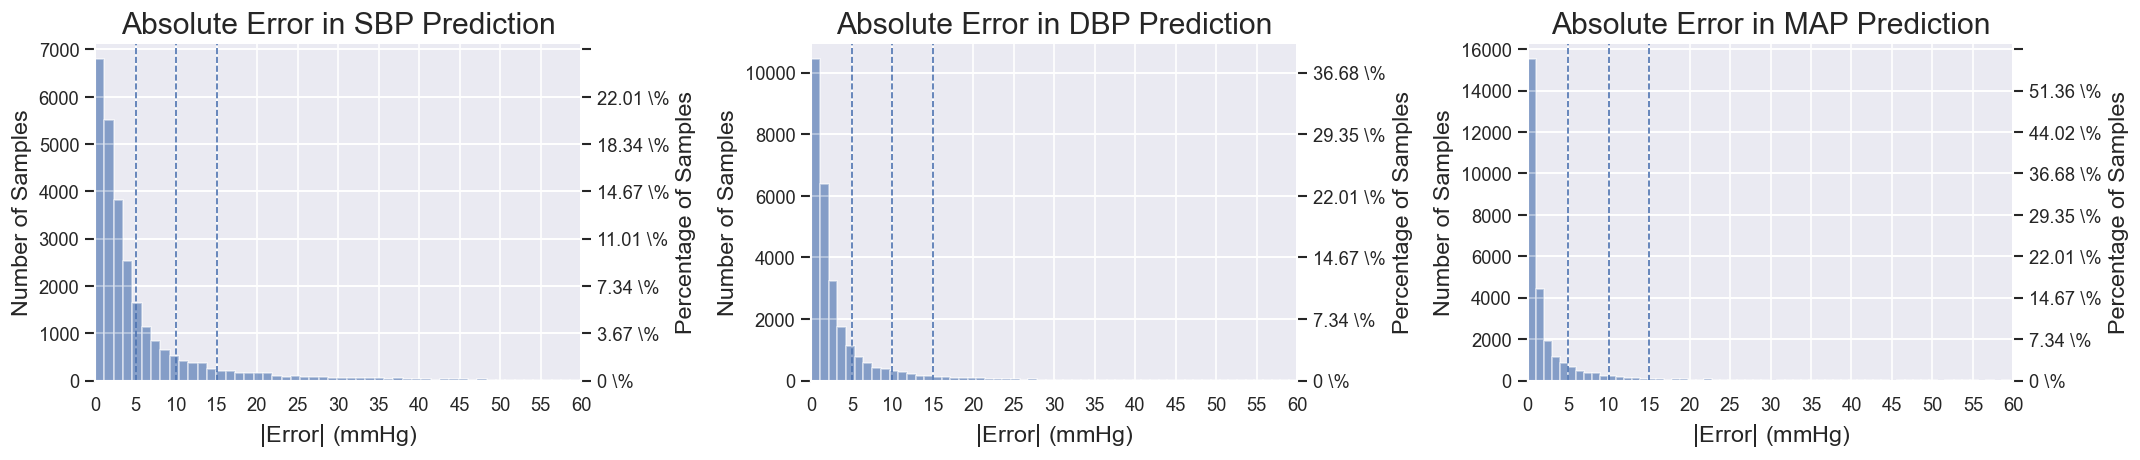

In [2]:
from evaluate import evaluate_BHS_Standard

evaluate_BHS_Standard()

## 6C. Evaluation of AAMI Standard

Here, we evaluate PPG2ABP under AAMI Standard

---------------------
|   AAMI Standard   |
---------------------
-----------------------
|     |  ME   |  STD  |
-----------------------
| DBP | 1.619 | 6.859 |
| MAP | 0.631 | 4.962 |
| SBP | -1.582 | 10.688 |
-----------------------


c:\Users\LuckyVerma\Documents\ABP-estimation-using-PPG\other\PPG2ABP\codes\evaluate.py:378: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['0 \%', '7.34 \%', '14.67 \%',
c:\Users\LuckyVerma\Documents\ABP-estimation-using-PPG\other\PPG2ABP\codes\evaluate.py:395: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['0 \%', '7.34 \%', '14.67 \%', '22.01 \%',
c:\Users\LuckyVerma\Documents\ABP-estimation-using-PPG\other\PPG2ABP\codes\evaluate.py:411: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['0 \%', '3.67 \%', '7.34 \%',


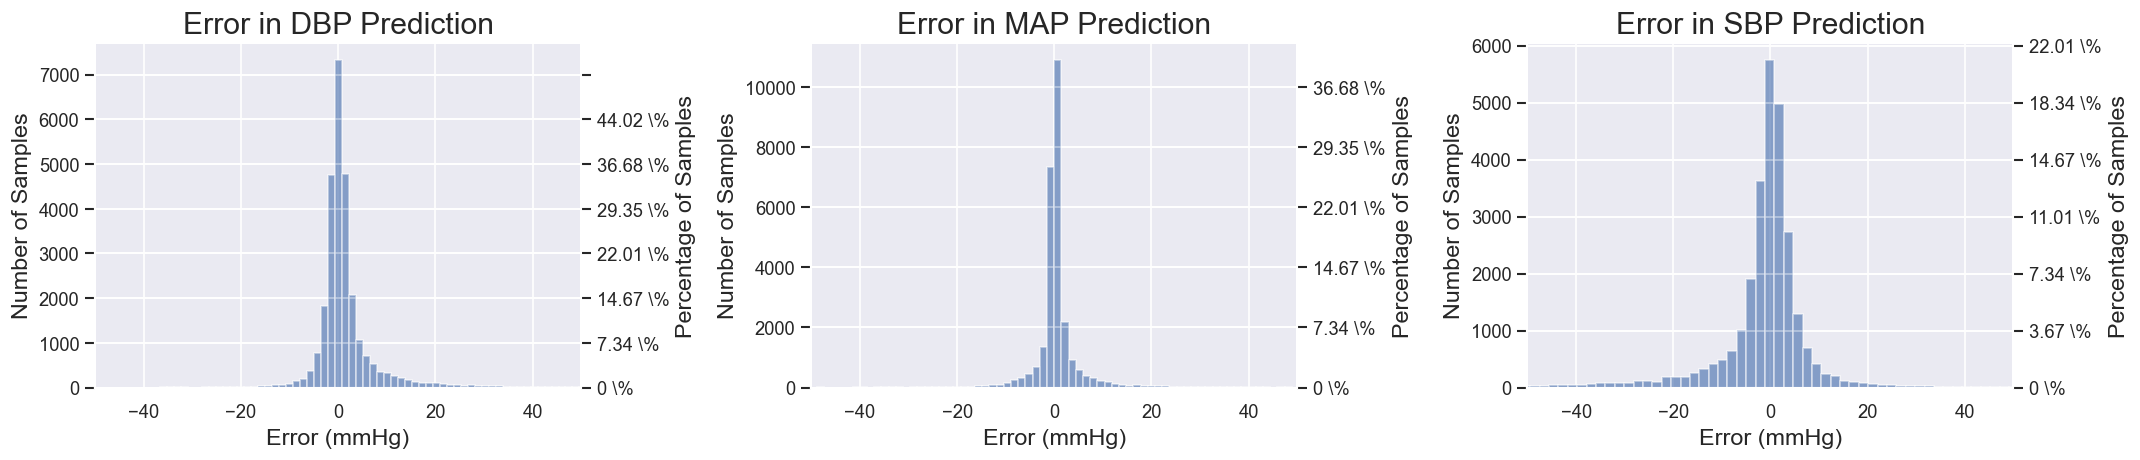

In [3]:
from evaluate import evaluate_AAMI_Standard

evaluate_AAMI_Standard()

## 6D. Evaluation of BP Classification Accuracy

Here, we evaluate PPG2ABP for BP Classification

DBPS Classification Accuracy
                  precision    recall  f1-score   support

    Hypertension    0.91663   0.67461   0.77721      3064
    Normotension    0.91345   0.98162   0.94631     19966
Pre-hypertension    0.76247   0.63972   0.69572      4230

        accuracy                        0.89406     27260
       macro avg    0.86418   0.76531   0.80641     27260
    weighted avg    0.89038   0.89406   0.88842     27260

SBPS Classification Accuracy
                 precision    recall  f1-score   support

   Hypertension    0.94676   0.98528   0.96563     20177
   Normotension    0.92368   0.72467   0.81216      1954
Prehypertension    0.86657   0.79899   0.83141      5129

       accuracy                        0.93155     27260
      macro avg    0.91233   0.83631   0.86973     27260
   weighted avg    0.93001   0.93155   0.92938     27260



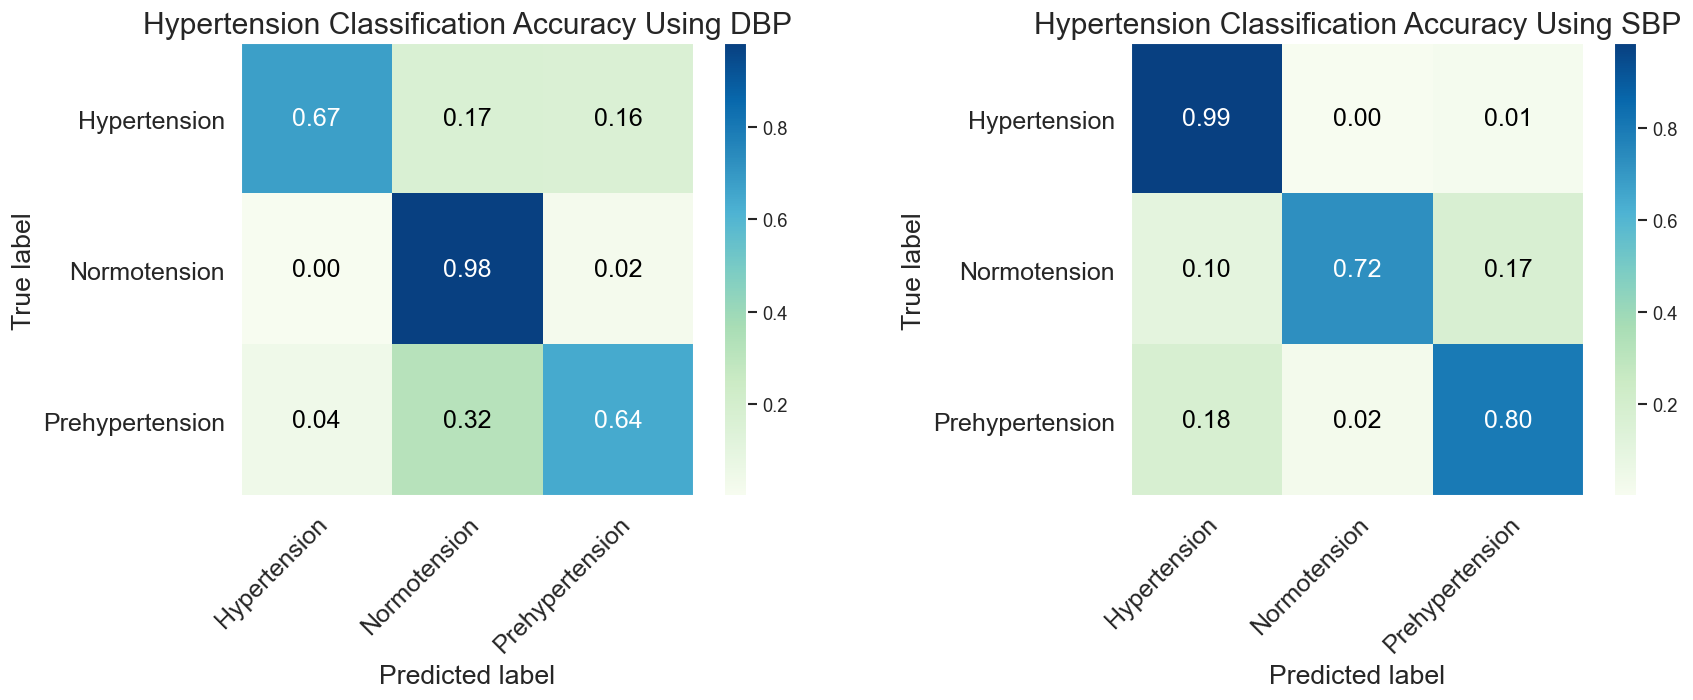

In [4]:
from evaluate import evaluate_BP_Classification

evaluate_BP_Classification()

## 6E. Bland Altman Plot

Here we draw the Bland Altman Plot for PPG2ABP

---------DBP---------
15.063734357565354 -11.825049870086156
---------MAP---------
10.357337974143608 -9.095027928291827
---------SBP---------
19.36690815175309 -22.530830437073465


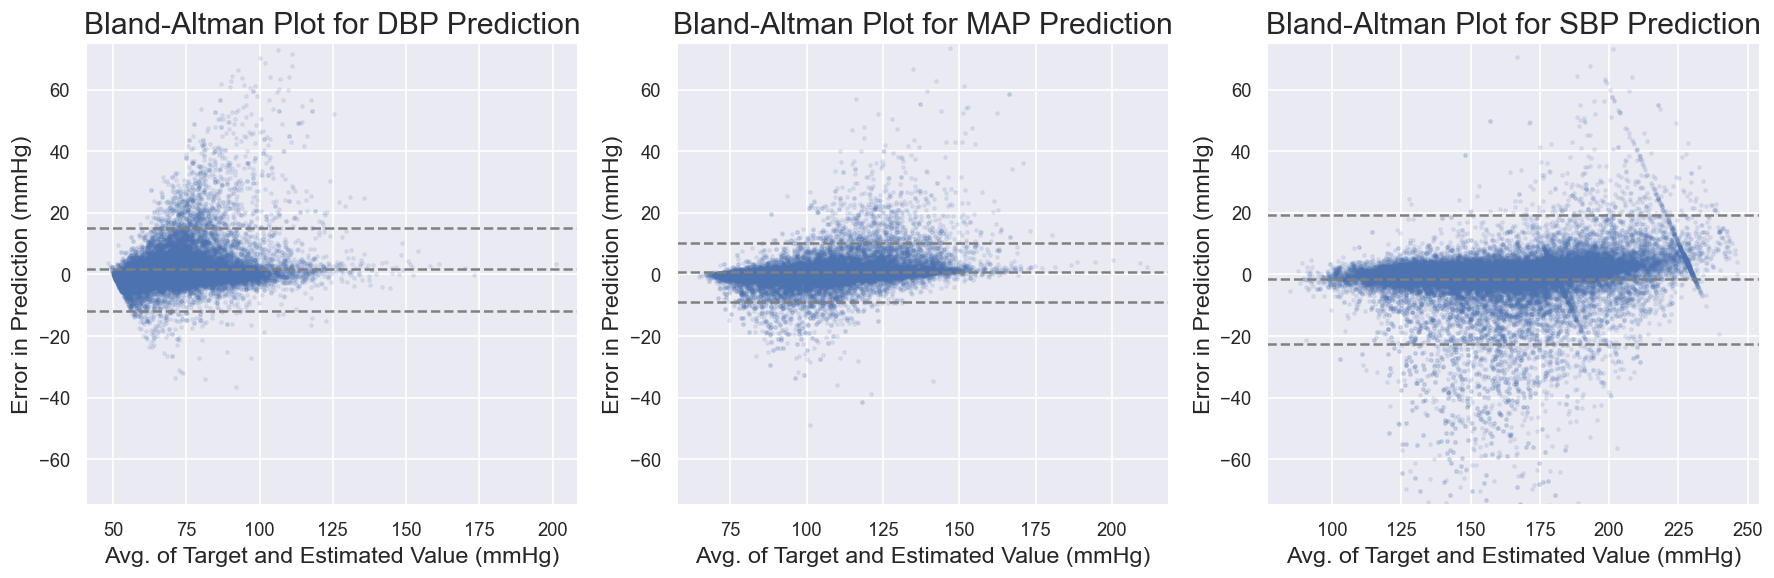

In [5]:
from evaluate import bland_altman_plot

bland_altman_plot()

## 6F. Regression Plot

Finally, the regression plot is drawn for PPG2ABP, in addition to the statistical values like r-value and p-value

c:\Users\LuckyVerma\anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


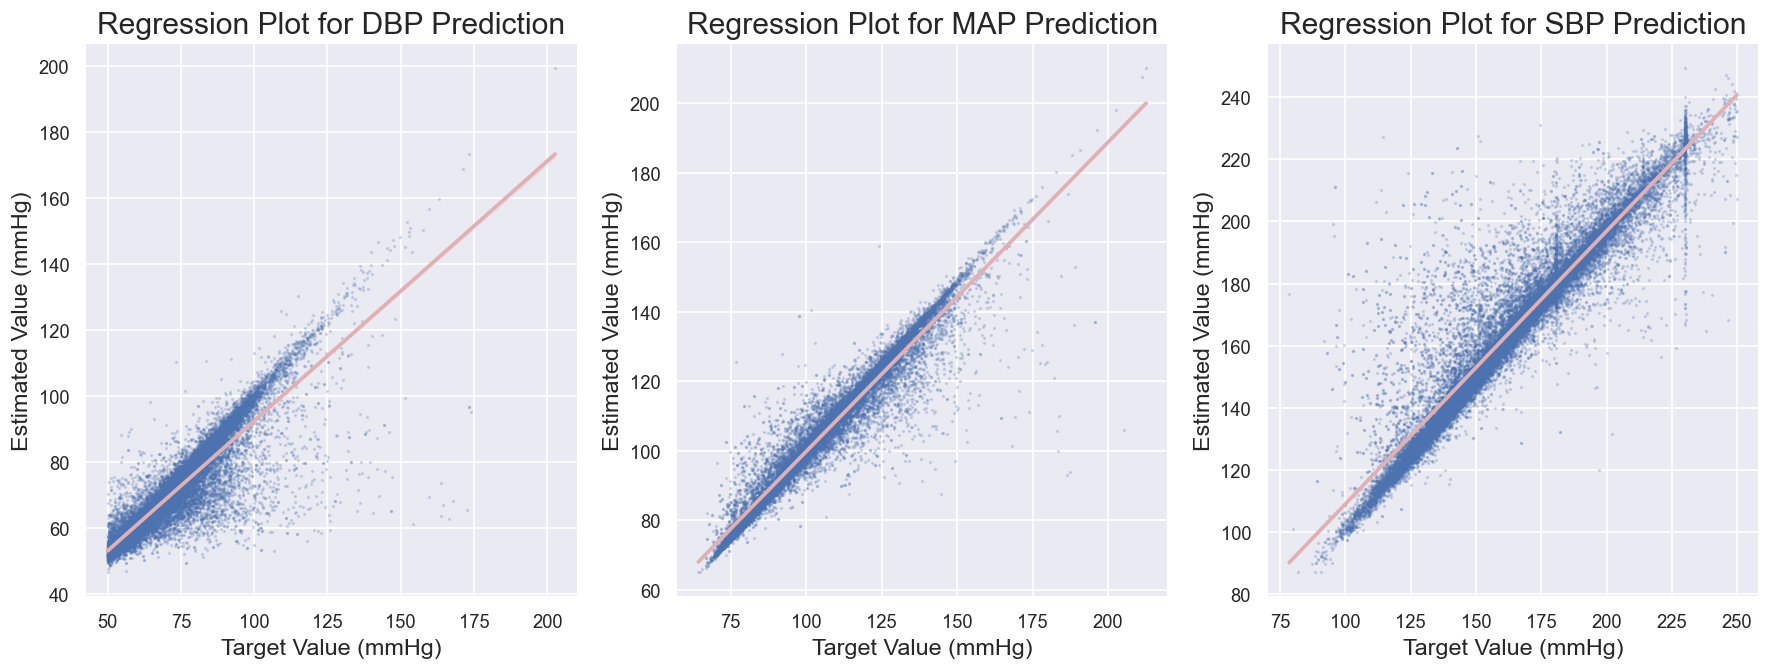

DBP
LinregressResult(slope=0.7881238636816054, intercept=13.603792335714793, rvalue=0.8940820122833719, pvalue=0.0, stderr=0.0023914118506289986, intercept_stderr=0.17567777140168242)
MAP
LinregressResult(slope=0.888962764540992, intercept=10.959912853769652, rvalue=0.9655721900959869, pvalue=0.0, stderr=0.0014506111969776968, intercept_stderr=0.15386350319583655)
SBP
LinregressResult(slope=0.8777571400312599, intercept=21.361264167471347, rvalue=0.9359630600916258, pvalue=0.0, stderr=0.002000011472971027, intercept_stderr=0.329253993878744)


In [6]:
from evaluate import regression_plot

regression_plot()